In [788]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [789]:
datapath='train.csv'
df=pd.read_csv(datapath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


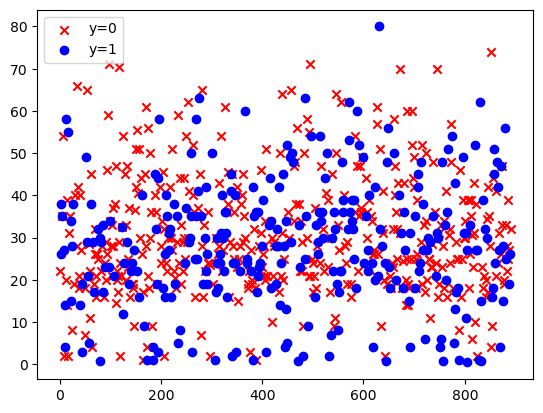

In [790]:
fig,ax=plt.subplots()
ax.scatter(df[df['Survived']==0]['PassengerId'],df[df['Survived']==0]['Age'],c='r',marker='x',label='y=0')
ax.scatter(df[df['Survived']==1]['PassengerId'],df[df['Survived']==1]['Age'],c='b',marker='o',label='y=1')
ax.legend()
plt.show()

In [791]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [792]:
print(df.isnull().sum())
print(df.dtypes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [793]:
f=df['Survived'].value_counts
print(f)

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>


In [794]:
df=df.drop('Cabin',axis=1)
df['Age']=df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mode()[0]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [795]:
print(df.isnull().sum())
imputer1 = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer1.fit_transform(df[['Embarked']])[:, 0]

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [796]:
a = pd.get_dummies(df['Sex'], prefix='Sex')
b = pd.get_dummies(df['Embarked'], prefix='Embarked')
df=df.drop(['Sex','Embarked'],axis=1)
df = pd.concat([df, a, b], axis=1)
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [797]:
targe = df['Survived']
y = targe.values
feature = df.drop(['Survived'],axis=1)
x=feature.values

In [798]:
print(feature.isnull().sum())

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [799]:
model = LR()
model.fit(x,y)

c:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [800]:
dt=pd.read_csv('test.csv')
h = dt['PassengerId']
print(dt.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [801]:
dt['Age']=dt.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mode()[0]))
dt = dt.drop(['Cabin'],axis=1)
a1 = pd.get_dummies(dt['Sex'], prefix='Sex')
b1 = pd.get_dummies(dt['Embarked'], prefix='Embarked')
dt=dt.drop(['Sex','Embarked'],axis=1)
dt = pd.concat([dt, a1, b1], axis=1)

In [802]:
dt.head()
x_test=dt.drop(['PassengerId','Name','Ticket'],axis=1)
imputer = SimpleImputer(strategy='mean')
x_test['Fare'] = imputer.fit_transform(x_test[['Fare']])

In [803]:
print(x_test.isnull().sum())

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [804]:
y_pred = model.predict(x_test)

c:\anaconda\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [805]:
y_pred
y_pred_series = pd.Series(y_pred)
print(y_pred_series)
h1 = pd.Series(h)
print(h1)
y_pred_series.name = 'Survived'
result_df = pd.concat([h1, y_pred_series], axis=1)
result_df.to_csv('output.csv', index=False)

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64
0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64
